# CAP 6615 Neural Networks Programming Assignment 2 – Multi-Layer Neural Network

### Keyuan Lu, Wenxuan Bao, Yiming Xu, Yufan Chen, Yue Bai

In [1]:
# import packages
from PIL import Image
import numpy as np
import itertools
import cv2
from matplotlib import pyplot as plt
import random 
from matplotlib.lines import Line2D
import pandas as pd
import string
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## Step 1 - Design and build a dataset $𝑋$ of for character recognition of 64 16x16-pixel images (256 pixels per image) from the following online exemplars.

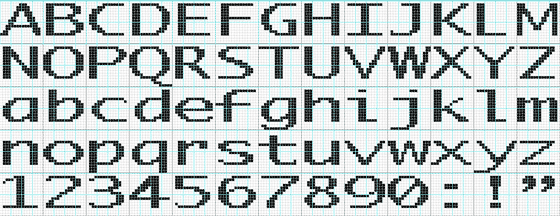

In [3]:
# you can download this 'alphabet.gif' directly from the programming assignment page on Canvas.
im = Image.open('alphabet.gif')
im

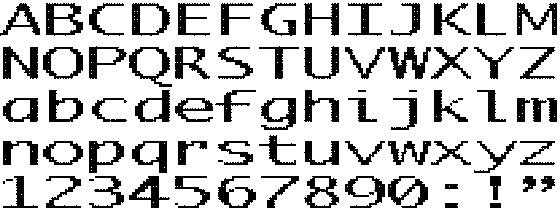

In [4]:
# convert image to black and white
im = im.convert('1')
im

In [5]:
w, h = im.size
print('width: ', w)
print('height:', h)

width:  560
height: 216


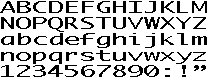

In [6]:
#resize the image
image_height = 16
image_width = 16
m = 13
n = 5
image_size = image_height*image_width
im_resize = im.resize((m*image_width, n*image_height))
im_resize

In [7]:
#check the resize image and change data type
pix = np.array(im_resize)
nrow, ncol = pix.shape
print(pix.shape)
print(pix.dtype)
# change the data type from bool to double
pix = pix.astype(np.float32)
print(pix.dtype)

(80, 208)
bool
float32


In [8]:
# construct the training dataset, validation dataset and testing dataset
n_train_sample = 32
n_val_sample = 16
n_test_sample = 32
n_channel  = 1
dataset_train = np.ndarray(shape=(n_train_sample, n_channel, image_height, image_width), dtype=np.float32)
dataset_train.shape
dataset_train.dtype
dataset_val = np.ndarray(shape=(n_val_sample, n_channel, image_height, image_width), dtype=np.float32)
dataset_val.shape
dataset_val.dtype
dataset_test = np.ndarray(shape=(n_test_sample, n_channel, image_height, image_width), dtype=np.float32)
dataset_test.shape
dataset_test.dtype

dtype('float32')

In [9]:
#create dataset_all
dataset_all = np.ndarray(shape=(65, n_channel, image_height, image_width), dtype=np.float32)
dataset_all.shape
dataset_all.dtype
idx = 0
for i in range(5):
    for j in range(13):
        x = pix[(i*image_height):( (i+1)*image_height), (j*image_width):( (j+1)*image_width)]
        dataset_all[idx] = x
        idx += 1
print("All images to array!")

All images to array!


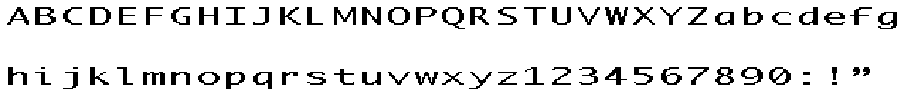

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]


In [10]:
#print all
fig, axs = plt.subplots(2, 33 ,figsize=(16,2))
for i, ax in enumerate(axs.flatten()):
    if i < len(dataset_all):
        ax.imshow(dataset_all[i, 0], cmap='gray', interpolation='nearest', vmin=0, vmax=1)
        ax.axis('off')
    else:
        ax.remove()
plt.show()
##A-Z is from 1 to 26
##a-z is from 27 to 52
##1 to 9 to 0 is from 53-62
## : is 63, ! is 64, " is 65  
labels_all = list(range(1, 66))
print(labels_all)

In [11]:
#create train
idx = 0
for i in range(5):
    for j in range(13):
        if( (i == 0 or i == 2) and ( 0 <= j <= 11) ):
            x = pix[(i*image_height):( (i+1)*image_height), (j*image_width):( (j+1)*image_width)]
            dataset_train[idx] = x
            idx += 1
        if( (i == 4) and (( 0 <= j <= 5) or (10 <= j <= 11))):
            x = pix[(i*image_height):( (i+1)*image_height), (j*image_width):( (j+1)*image_width)]
            dataset_train[idx] = x
            idx += 1
            
#create val
idx = 0
for i in range(5):
    for j in range(13):
        if( (i == 0 or i == 2) and ( 0 <= j <= 5) ):
            x = pix[(i*image_height):( (i+1)*image_height), (j*image_width):( (j+1)*image_width)]
            dataset_val[idx] = x
            idx += 1
            
        if( (i == 4) and ( 0 <= j <= 3) ):
            x = pix[(i*image_height):( (i+1)*image_height), (j*image_width):( (j+1)*image_width)]
            dataset_val[idx] = x
            idx += 1
            

#create test
idx = 0
for i in range(5):
    for j in range(13):
        if( (i == 0 or i == 2) and ( j == 12) ):
            x = pix[(i*image_height):( (i+1)*image_height), (j*image_width):( (j+1)*image_width)]
            dataset_test[idx] = x
            idx += 1
        if( (i == 1 or i == 3) and ( 0 <= j <= 12) ):
            x = pix[(i*image_height):( (i+1)*image_height), (j*image_width):( (j+1)*image_width)]
            dataset_test[idx] = x
            idx += 1
        if( (i == 4) and ( 6 <= j <= 9) ):
            x = pix[(i*image_height):( (i+1)*image_height), (j*image_width):( (j+1)*image_width)]
            dataset_test[idx] = x
            idx += 1
print("All images to array!")

All images to array!


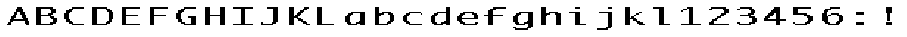

32

In [12]:
#print train
fig, axs = plt.subplots(1, 32 ,figsize=(16,16))
for i, ax in enumerate(axs.flatten()):
    if i < len(dataset_train):
        ax.imshow(dataset_train[i, 0], cmap='gray', interpolation='nearest', vmin=0, vmax=1)
        ax.axis('off')
    else:
        ax.remove()
plt.show()
##A-Z is from 1 to 26
##a-z is from 27 to 52
##1 to 9 to 0 is from 53-62
## : is 63, ! is 64, " is 65  
labels_train = [1,2,3,4,5,6,7,8,9,10,11,12,27,28,29,30,31,32,33,34,35,36,37,38,53,54,55,56,57,58,63,64]
len(labels_train)

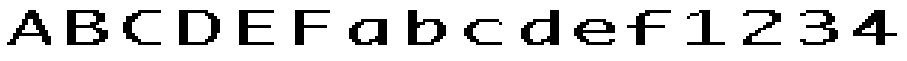

16

In [13]:
#print val
fig, axs = plt.subplots(1, 16 ,figsize=(16,16))
for i, ax in enumerate(axs.flatten()):
    if i < len(dataset_val):
        ax.imshow(dataset_val[i, 0], cmap='gray', interpolation='nearest', vmin=0, vmax=1)
        ax.axis('off')
    else:
        ax.remove()
plt.show()
##A-Z is from 1 to 26
##a-z is from 27 to 52
##1 to 9 to 0 is from 53-62
## : is 63, ! is 64, " is 65  
labels_val = [1,2,3,4,5,6,27,28,29,30,31,32,53,54,55,56]
len(labels_val)

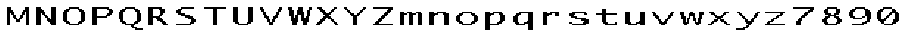

32

In [14]:
#print test
fig, axs = plt.subplots(1, 32 ,figsize=(16,16))
for i, ax in enumerate(axs.flatten()):
    if i < len(dataset_test):
        ax.imshow(dataset_test[i, 0], cmap='gray', interpolation='nearest', vmin=0, vmax=1)
        ax.axis('off')
    else:
        ax.remove()
plt.show()
##A-Z is from 1 to 26
##a-z is from 27 to 52
##1 to 9 to 0 is from 53-62
## : is 63, ! is 64, " is 65  
labels_test = [13,14,15,16,17,18,19,20,21,22,23,24,25,26,39,40,41,42,43,44,45,46,47,48,49,50,51,52,59,60,61,62]
len(labels_test)

In [15]:
# flatten the data
dataset_train_reshaped = dataset_train.reshape((n_train_sample, 1, -1))
dataset_val_reshaped = dataset_val.reshape((n_val_sample, 1, -1))
dataset_test_reshaped = dataset_test.reshape((n_test_sample, 1, -1))

In [16]:
dataset_train_reshaped.shape

(32, 1, 256)

###  Use SIFT (Scale Invariant Feature Transformation) to derive numerical descriptive parameters from the individual data set exemplars

In [17]:
des_train = np.ndarray(shape=(n_train_sample, n_channel, image_height, image_width), dtype=np.float32)
des_train.shape
des_train.dtype
des_val = np.ndarray(shape=(n_val_sample, n_channel, image_height, image_width), dtype=np.float32)
des_val.shape
des_val.dtype
des_test = np.ndarray(shape=(n_test_sample, n_channel, image_height, image_width), dtype=np.float32)
des_test.shape
des_test.dtype

dtype('float32')

In [18]:
# for idx in range(n_train_sample):
#     img1 = dataset_train[idx, 0]
#     img1 = 255 * img1 # Now scale by 255
#     img = img1.astype(np.uint8)
#     #find keypoints and descriptors
#     sift = cv2.xfeatures2d.SIFT_create(nfeatures=5)
#     kp_1, des_1 = sift.detectAndCompute(img,None)
#     print(des_1.shape)

    

In [19]:
# idx = 0
# img1 = dataset_train[idx, 0]
# img1 = 255 * img1 # Now scale by 255
# img = img1.astype(np.uint8)
# img

In [20]:
# #find keypoints and descriptors
# sift = cv2.xfeatures2d.SIFT_create()
# kp_1, des_1 = sift.detectAndCompute(img,None)


In [21]:
# img_1 = cv2.drawKeypoints(img, kp_1,img)
# plt.imshow(img_1)

In [22]:
# des_1

## Step 2 - Design and develop two (MLNN) in Python, using libraries such as PyTorch (and, if necessary, Tensor Flow). 

### Approach 1-a: Simple Network with Scalar Output (use original image as input)

In [23]:
##Approach 1, Adding an extra hidden layer between input layer and output layer
class TrainableEltwiseLayer(nn.Module):
    def __init__(self,D_in):
        super(TrainableEltwiseLayer, self).__init__()
        self.weights = nn.Parameter(torch.randn(D_in))  # define the trainable parameter
        self.linear = nn.Linear(D_in,D_in)
        #self.Sigmoid = nn.Sigmoid()
        self.Relu = torch.nn.ReLU()
    def forward(self, x):
        x_1 = self.linear(x)
        #x_2 = self.Sigmoid(x_1)
        x_2 = self.Relu(x_1)
        # assuming x is of size b-1-h-w
        return torch.sum(x_2 * self.weights) + 1

In [24]:
model_Ap1 = TrainableEltwiseLayer(256)
model_Ap1

TrainableEltwiseLayer(
  (linear): Linear(in_features=256, out_features=256, bias=True)
  (Relu): ReLU()
)

### Approach 2: Fully-connected Network with Image Output:  

In [25]:
model_Ap2 = torch.nn.Sequential(
    nn.Linear(256, 256),
    #nn.Sigmoid(),
    nn.ReLU(),
    nn.Linear(256, 256),
    nn.Sigmoid()
)
model_Ap2

Sequential(
  (0): Linear(in_features=256, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): Sigmoid()
)

### Approach 1-b: Simple Network with Scalar Output: (use SIFT metrics as input)

In [26]:
model_Ap1b = TrainableEltwiseLayer(256)
model_Ap1b

TrainableEltwiseLayer(
  (linear): Linear(in_features=256, out_features=256, bias=True)
  (Relu): ReLU()
)

## Step 3 - Train your MLNNs on your Training Set (from Step 1, above) then test each MLNN to ensure it functions correctly before you go on to Step 4.

In [27]:
#set seed for reproducible results 
torch.manual_seed(1)
np.random.seed(1)
# define loss function.
loss_fn = nn.MSELoss()
# Use the optim package to define an Optimizer that will update the weights of the model for us. 
learning_rate = 1e-5
optimizer = optim.Adam(model_Ap1.parameters(), lr=learning_rate)
loss_all_1 = []
for t in range (1000):
    for i, data in enumerate(dataset_train_reshaped):
        y = torch.from_numpy(np.array(labels_train[i])).float()
        x = torch.from_numpy(data).float()
        # Forward pass: compute predicted y by passing x to the model.
        y_pred = model_Ap1(x)

        # Compute and print loss.
        loss = loss_fn(y_pred, y)
        if (i % 32 == 0 ) and (t % 10 == 0 ):
            print("Epoch {} - loss: {}".format(t, loss.item()))
        if (i % 32 == 0 ):
            loss_all_1 += [loss]

        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the variables it will update (which are the learnable
        # weights of the model). This is because by default, gradients are
        # accumulated in buffers( i.e, not overwritten) whenever .backward()
        # is called. Checkout docs of torch.autograd.backward for more details.
        optimizer.zero_grad()

        # Backward pass: compute gradient of the loss with respect to model
        # parameters
        loss.backward()

        # Calling the step function on an Optimizer makes an update to its
        # parameters
        optimizer.step()

Epoch 0 - loss: 0.8894150853157043
Epoch 10 - loss: 541.9786987304688
Epoch 20 - loss: 661.4629516601562
Epoch 30 - loss: 666.10498046875
Epoch 40 - loss: 650.2277221679688
Epoch 50 - loss: 636.6296997070312
Epoch 60 - loss: 616.824462890625
Epoch 70 - loss: 597.3065185546875
Epoch 80 - loss: 575.9649658203125
Epoch 90 - loss: 555.4732055664062
Epoch 100 - loss: 534.336181640625
Epoch 110 - loss: 512.337646484375
Epoch 120 - loss: 490.503173828125
Epoch 130 - loss: 468.948974609375
Epoch 140 - loss: 449.58843994140625
Epoch 150 - loss: 429.31646728515625
Epoch 160 - loss: 409.4142761230469
Epoch 170 - loss: 389.7001953125
Epoch 180 - loss: 370.89154052734375
Epoch 190 - loss: 352.1940002441406
Epoch 200 - loss: 334.03912353515625
Epoch 210 - loss: 315.9065246582031
Epoch 220 - loss: 299.23480224609375
Epoch 230 - loss: 282.6327209472656
Epoch 240 - loss: 266.7146911621094
Epoch 250 - loss: 250.49989318847656
Epoch 260 - loss: 236.31509399414062
Epoch 270 - loss: 221.953857421875
Epoch 

Text(0, 0.5, 'MSEloss')

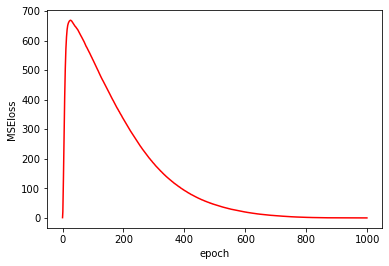

In [28]:
plt.plot(np.array(loss_all_1), 'r')
plt.xlabel("epoch")
plt.ylabel("MSEloss")

Epoch 0 - loss: 0.2507854104042053
Epoch 10 - loss: 0.07960968464612961
Epoch 20 - loss: 0.015626825392246246
Epoch 30 - loss: 0.005820725578814745
Epoch 40 - loss: 0.0028304383158683777
Epoch 50 - loss: 0.0014708415837958455
Epoch 60 - loss: 0.0008629206568002701
Epoch 70 - loss: 0.000554132740944624
Epoch 80 - loss: 0.00038026776746846735
Epoch 90 - loss: 0.00027063634479418397
Epoch 100 - loss: 0.00019800175505224615
Epoch 110 - loss: 0.0001478741323808208
Epoch 120 - loss: 0.00011375690519344062
Epoch 130 - loss: 8.828599675325677e-05
Epoch 140 - loss: 6.9668676587753e-05
Epoch 150 - loss: 5.583753591054119e-05
Epoch 160 - loss: 4.4476226321421564e-05
Epoch 170 - loss: 3.60438170901034e-05
Epoch 180 - loss: 2.917557503678836e-05
Epoch 190 - loss: 2.3778460672474466e-05
Epoch 200 - loss: 1.945924486790318e-05
Epoch 210 - loss: 1.6016538211260922e-05
Epoch 220 - loss: 1.3166531061870046e-05
Epoch 230 - loss: 1.091115154849831e-05
Epoch 240 - loss: 9.010143912746571e-06
Epoch 250 - lo

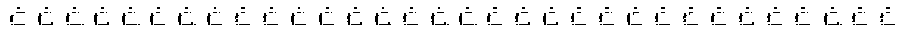

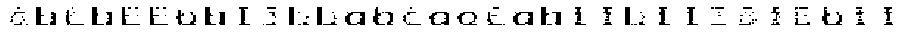

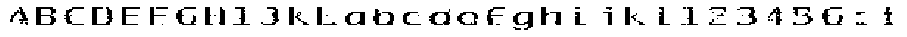

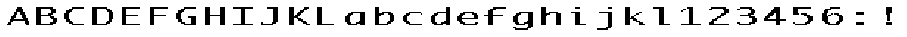

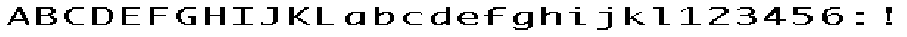

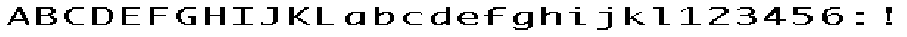

In [29]:
#set seed for reproducible results 
torch.manual_seed(1)
np.random.seed(1)
# define loss function.
loss_fn = nn.MSELoss()
# Use the optim package to define an Optimizer that will update the weights of the model for us. 
learning_rate = 1e-3
optimizer = optim.Adam(model_Ap2.parameters(), lr=learning_rate)
loss_all = []
for t in range (300):
    for i, data in enumerate(dataset_train_reshaped):
        y = torch.from_numpy(data)
        x = torch.from_numpy(data)
        # Forward pass: compute predicted y by passing x to the model.
        y_pred = model_Ap2(x)

        # Compute and print loss.
        loss = loss_fn(y_pred, y)      
        if (i % 32 == 0 ) and (t % 10 == 0 ):
            print("Epoch {} - loss: {}".format(t, loss.item()))
            
        if (i % 32 == 0 ):
            loss_all += [loss]

        # Before the backward pass, use the optimizer object to zero all of the
        # gradients for the variables it will update (which are the learnable
        # weights of the model). This is because by default, gradients are
        # accumulated in buffers( i.e, not overwritten) whenever .backward()
        # is called. Checkout docs of torch.autograd.backward for more details.
        optimizer.zero_grad()

        # Backward pass: compute gradient of the loss with respect to model
        # parameters
        loss.backward()

        # Calling the step function on an Optimizer makes an update to its
        # parameters
        optimizer.step()
        if (i % 32 == 31 ) and (t in [ 0, 4, 9, 49, 99 ,199] ):
            fig, axs = plt.subplots(1, n_train_sample ,figsize=(16, 16))
            for j, data_j in enumerate(dataset_train_reshaped):
                x = torch.from_numpy(data_j)
                output = model_Ap2(x)
                output[output > 0.5] = 1
                output[output <= 0.5] = 0
                pred = output.detach().numpy()
                pred = pred.reshape((image_height, image_width ))
                ax = axs.flatten()[j]
                ax.imshow(pred, cmap='gray', interpolation='nearest')
                ax.axis('off')

Text(0, 0.5, 'MSEloss')

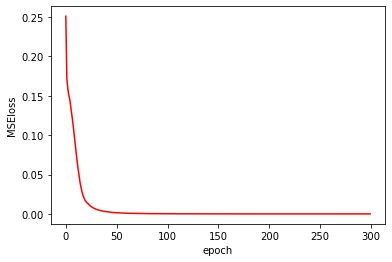

In [30]:
plt.plot(np.array(loss_all), 'r')
plt.xlabel("epoch")
plt.ylabel("MSEloss")

In [31]:
# training result in approach 1
cor = 0
for i, data in enumerate(dataset_train_reshaped):
    x = torch.from_numpy(data)
    label = labels_train[i]
    out =round(model_Ap1(x).float().item())
    if out < 1:
        out = 1
    if out > 65:
        out = 65
    if out == label:
        cor += 1 
    print("answer: {},output {}".format(label, out))
print("accuracy:{}".format(cor/n_train_sample))

answer: 1,output 1
answer: 2,output 2
answer: 3,output 3
answer: 4,output 4
answer: 5,output 5
answer: 6,output 6
answer: 7,output 7
answer: 8,output 8
answer: 9,output 10
answer: 10,output 10
answer: 11,output 11
answer: 12,output 12
answer: 27,output 27
answer: 28,output 28
answer: 29,output 29
answer: 30,output 30
answer: 31,output 31
answer: 32,output 32
answer: 33,output 33
answer: 34,output 34
answer: 35,output 36
answer: 36,output 36
answer: 37,output 37
answer: 38,output 38
answer: 53,output 52
answer: 54,output 54
answer: 55,output 55
answer: 56,output 56
answer: 57,output 57
answer: 58,output 58
answer: 63,output 63
answer: 64,output 64
accuracy:0.90625


answer: 13,output 21
answer: 14,output 7
answer: 15,output 28
answer: 16,output 8
answer: 17,output 27
answer: 18,output 23
answer: 19,output 33
answer: 20,output 23
answer: 21,output 14
answer: 22,output 21
answer: 23,output 39
answer: 24,output 44
answer: 25,output 50
answer: 26,output 35
answer: 39,output 33
answer: 40,output 27
answer: 41,output 44
answer: 42,output 28
answer: 43,output 30
answer: 44,output 25
answer: 45,output 29
answer: 46,output 61
answer: 47,output 20
answer: 48,output 24
answer: 49,output 36
answer: 50,output 37
answer: 51,output 35
answer: 52,output 27
answer: 59,output 46
answer: 60,output 25
answer: 61,output 34
answer: 62,output 57
accuracy:0.0


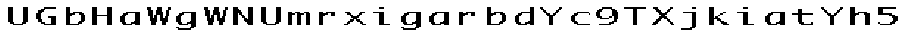

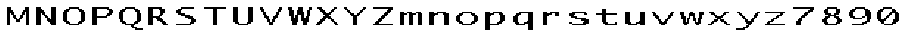

In [32]:
# test approach 1
cor = 0
fig, axs = plt.subplots(1, n_test_sample, figsize=(16,16))
for i, data in enumerate(dataset_test_reshaped):
    x = torch.from_numpy(data)
    label = labels_test[i]
    out =round(model_Ap1(x).float().item())
    if out < 1:
        out = 1
    if out > 65:
        out = 65
    if out == label:
        cor += 1 
    pred = dataset_all[out-1, 0]
    ax = axs.flatten()[i]
    ax.imshow(pred, cmap='gray', interpolation='nearest')
    ax.axis('off')
    print("answer: {},output {}".format(label, out))
print("accuracy:{}".format(cor/n_test_sample))


#print test
fig, axs = plt.subplots(1, n_test_sample, figsize=(16,16))
for i, ax in enumerate(axs.flatten()):
    if i < len(dataset_test):
        ax.imshow(dataset_test[i, 0], cmap='gray', interpolation='nearest', vmin=0, vmax=1)
        ax.axis('off')
    else:
        ax.remove()
plt.show()

In [33]:
#Compute metrics 
def metrics(target, pred):
    Fh = sum((target == 0) & (target == pred))/ sum(target == 0)
    Ffa = sum((target == 1) & (target != pred))/ sum(target == 1)
    return Fh, Ffa

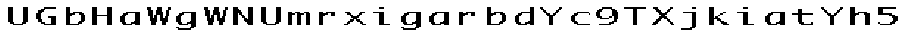

In [34]:
# model 1
Fh_res = []
Ffa_res = []
fig, axs = plt.subplots(1, n_test_sample ,figsize=(16, 16))
for i, data in enumerate(dataset_test_reshaped):
    x = torch.from_numpy(data)
    label = labels_test[i]
    out =round(model_Ap1(x).float().item())
    if out < 1:
        out = 1
    if out > 65:
        out = 65
    pred = dataset_all[out-1, 0]
    ax = axs.flatten()[i]
    ax.imshow(pred, cmap='gray', interpolation='nearest')
    ax.axis('off')
    x = x.flatten().detach().numpy()
    y = pred.flatten()
    Fh, Ffa = metrics(x, y)
    Fh_res+= [Fh]
    Ffa_res+= [Ffa]

Text(0, 0.5, 'Fh')

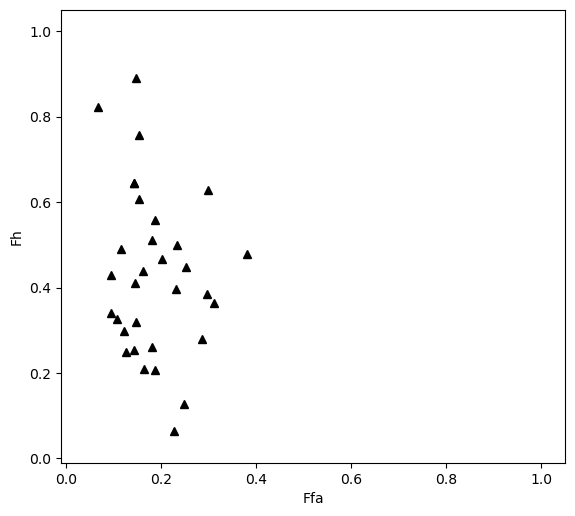

In [35]:
plt.figure(figsize=[6.5,6],dpi=100)
plt.plot(Ffa_res, Fh_res, '^', color='black');
plt.xlim(-0.01, 1.05)
plt.ylim(-0.01, 1.05)
plt.xlabel("Ffa")
plt.ylabel("Fh")

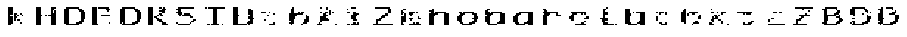

In [36]:
#model 2
Fh_res = []
Ffa_res = []
fig, axs = plt.subplots(1, n_test_sample ,figsize=(16, 16))

for i, data in enumerate(dataset_test_reshaped):
    x = torch.from_numpy(data)
    output = model_Ap2(x)
    output[output > 0.5] = 1
    output[output <= 0.5] = 0
    pred = output.detach().numpy()
    pred = pred.reshape((image_height, image_width ))
    ax = axs.flatten()[i]
    ax.imshow(pred, cmap='gray', interpolation='nearest')
    ax.axis('off')
    x = x.flatten().detach().numpy()
    y = output.flatten().detach().numpy()
    Fh, Ffa = metrics(x, y)
    Fh_res+= [Fh]
    Ffa_res+= [Ffa]

Text(0, 0.5, 'Fh')

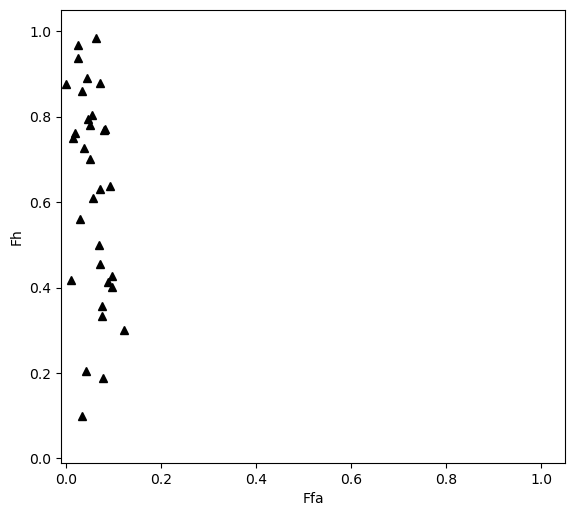

In [37]:
plt.figure(figsize=[6.5,6],dpi=100)
plt.plot(Ffa_res, Fh_res, '^', color='black');
plt.xlim(-0.01, 1.05)
plt.ylim(-0.01, 1.05)
plt.xlabel("Ffa")
plt.ylabel("Fh")
# plt.savefig('Fh_Ffa_noiseless.eps')

## Step 5 - Compute Receiver Operating Characteristic (ROC) from the results of Step 4 (for each MLNN) and graph the result,

In [38]:
# model 1
y_test = np.empty(0, int)
y_score = np.empty(0)
for i, data in enumerate(dataset_test_reshaped):
    x = torch.from_numpy(data)
    label = labels_test[i]
    out =round(model_Ap1(x).float().item())
    if out < 1:
        out = 1
    if out > 65:
        out = 65
    pred = dataset_all[out-1, 0]
    x = x.flatten().detach().numpy()
    y = pred.flatten() 
    y_test = np.append(y_test, x)
    y_score = np.append(y_score, y)

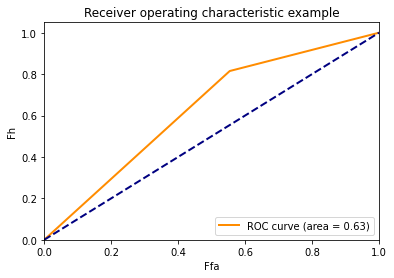

In [39]:
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ffa')
plt.ylabel('Fh')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [40]:
#model 2
y_test = np.empty(0, int)
y_score = np.empty(0)
for i, data in enumerate(dataset_test_reshaped):
    x = torch.from_numpy(data)
    output = model_Ap2(x)
    y = output.flatten().detach().numpy()
    y_score = np.append(y_score, y)
    #output[output > 0.5] = 1
    #output[output <= 0.5] = 0
    x = x.flatten().detach().numpy()   
    y_test = np.append(y_test, x)


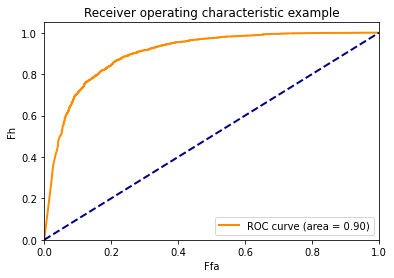

In [41]:
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ffa')
plt.ylabel('Fh')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


## Step 6 - 6a) Corrupt your Test Set (from 1), above) by adding noise; 

In [42]:
# standard deviation
sd = [0.0, 0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1]
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
def NoiseData(dataset, sigma):
    dataset_noise = np.ndarray(shape=dataset.shape, dtype=np.float32)
    #set seed for random numbers
    random.seed(1)
    for i in range(len(dataset)):
        s = np.random.normal(0, sigma, 25)
        index = random.sample(list(range(256)), 25)
        dataset_noise[i] = dataset[i]    
        dataset_noise[i, 0, index] = dataset_noise[i, 0, index] + s
        dataset_noise[i,0] = NormalizeData(dataset_noise[i,0 ])
    return dataset_noise   

### 6b) Repeat Tests in Step 4), above, with noise-corrupted Test Set and gather the results into a table of Fh and Ffa versus test-image-ID, with one row for each value of the standard deviation

#### model 1

In [43]:
#model 1
Fh_res_all = []
Ffa_res_all = []
for sigma in sd:
    print(sigma)
    dataset_test_noise = NoiseData(dataset_test_reshaped, sigma)
    # test results
    Fh_res = []
    Ffa_res = []
    fig, axs = plt.subplots(1, n_test_sample ,figsize=(12, 12))
    for i, data in enumerate(dataset_test_noise):
        x = torch.from_numpy(data)
        label = labels_test[i]
        out =round(model_Ap1(x).float().item())
        if out < 1:
            out = 1
        if out > 65:
            out = 65
        pred = dataset_all[out-1, 0]
        ax = axs.flatten()[i]
        ax.imshow(pred, cmap='gray', interpolation='nearest')
        ax.axis('off')
        x = dataset_test_reshaped[i].reshape([-1])
        y = pred.flatten()
        Fh, Ffa = metrics(x, y)
        Fh_res+= [Fh]
        Ffa_res+= [Ffa]
    Fh_res_all.append(Fh_res)
    Ffa_res_all.append(Ffa_res)

0.0
0.001
0.002
0.003
0.005
0.01
0.02
0.03
0.05
0.1


In [44]:
Fh_res_all[7]

[0.37349397590361444,
 0.4891304347826087,
 0.4864864864864865,
 0.25757575757575757,
 0.43902439024390244,
 0.23076923076923078,
 0.24561403508771928,
 0.2916666666666667,
 0.8904109589041096,
 0.5,
 0.23529411764705882,
 0.2711864406779661,
 0.13636363636363635,
 0.2857142857142857,
 0.4470588235294118,
 0.6935483870967742,
 0.7857142857142857,
 0.2191780821917808,
 0.3561643835616438,
 0.3488372093023256,
 0.6538461538461539,
 0.26,
 0.06451612903225806,
 0.6153846153846154,
 0.20588235294117646,
 0.28888888888888886,
 0.3125,
 0.627906976744186,
 0.1956521739130435,
 0.2972972972972973,
 0.2602739726027397,
 0.43373493975903615]

Text(0.5, 1.0, 'Graph of Fh and Ffa vs. Noise Standard Deviation\n for noise-corrupted Alphanumeric Imagery (16x16 pixels) for Heteroassociative  Multi-Layer Neural Network')

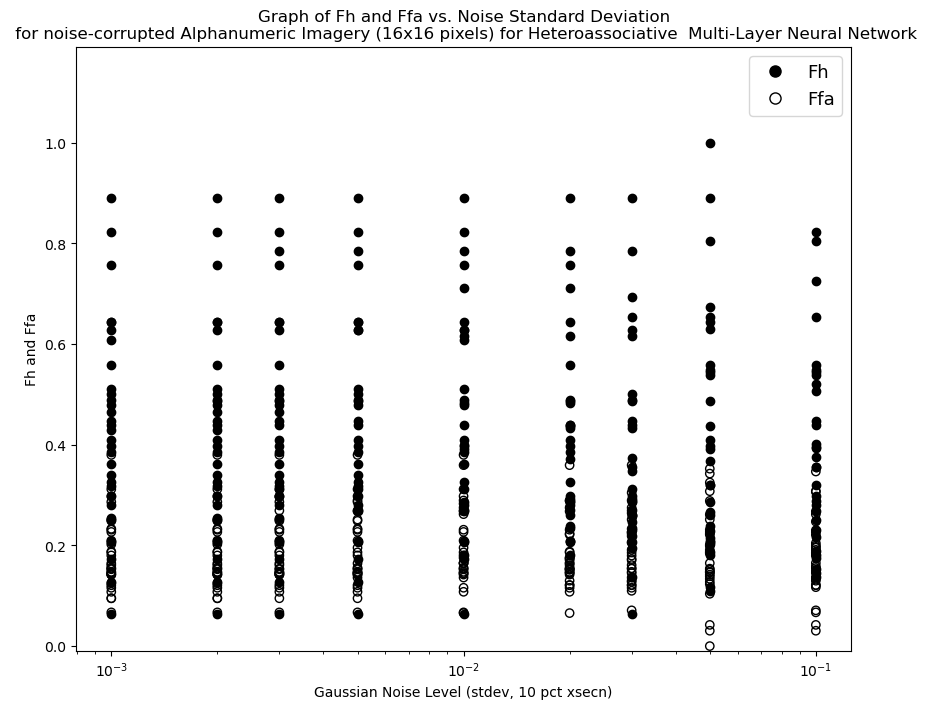

In [45]:
plt.figure(figsize=[10,8],dpi=100)
for i in range(1, len(sd)):
    plt.plot([sd[i]]*n_test_sample, Fh_res_all[i],'o', color='black')
    plt.scatter([sd[i]]*n_test_sample, Ffa_res_all[i], facecolors='none', edgecolors='black')
    plt.xscale('log')

# plt.xlim(0, 0.1)
plt.ylim(-0.01, 1.19)
plt.xlabel("Gaussian Noise Level (stdev, 10 pct xsecn)")
plt.ylabel("Fh and Ffa")
legend_elements = [Line2D([0], [0], marker='o', color='k', lw=0, markersize=8, markerfacecolor='k', label='Fh'),
                  Line2D([0], [0], marker='o', color='k', lw=0, markersize=8, markerfacecolor='w', label='Ffa')]
plt.legend(handles=legend_elements,fontsize=13)
# plt.text(0.002,1.1,'Training set = { \'C\', \'D\', \'E\', \'H\', \'I\', \'1\', \'3\', \'4\', \'5\', \'9\'}',fontsize=13)
plt.title("Graph of Fh and Ffa vs. Noise Standard Deviation\n for noise-corrupted Alphanumeric Imagery (16x16 pixels) for Heteroassociative  Multi-Layer Neural Network")

# plt.savefig('Fh_Ffa_noise.eps')

In [46]:
lowercase = list(string.ascii_lowercase)
uppercase = list(string.ascii_uppercase)
labels_all = np.array(uppercase + lowercase + list(range(1, 10)) + ['0', ':', '!', '"'])
labels_all
##A-Z is from 1 to 26
##a-z is from 27 to 52
##1 to 9 to 0 is from 53-62
## : is 63, ! is 64, " is 65  
labels = labels_all[[x - 1 for x in labels_test]]
Fh_df=pd.DataFrame(Fh_res_all,columns=labels,index=sd).T
Ffa_df=pd.DataFrame(Ffa_res_all,columns=labels,index=sd).T

In [47]:
table=pd.DataFrame()
for i in range(Fh_df.shape[1]):
    table=pd.concat([table,Fh_df.iloc[:,i],Ffa_df.iloc[:,i]],axis=1)
table=table.round(decimals=2)
table

,0.000,0.000,0.001,0.001,0.002,0.002,0.003,0.003,0.005,0.005,0.010,0.010,0.020,0.020,0.030,0.030,0.050,0.050,0.100,0.100
M,0.40,0.23,0.40,0.23,0.40,0.23,0.40,0.23,0.40,0.23,0.40,0.23,0.40,0.23,0.37,0.11,0.40,0.23,0.51,0.35
N,0.49,0.12,0.49,0.12,0.49,0.12,0.49,0.12,0.49,0.12,0.49,0.12,0.49,0.12,0.49,0.12,0.80,0.03,0.80,0.03
O,0.61,0.15,0.61,0.15,0.49,0.15,0.49,0.15,0.49,0.15,0.61,0.15,0.49,0.15,0.49,0.15,0.49,0.15,0.19,0.25
P,0.76,0.15,0.76,0.15,0.76,0.15,0.76,0.15,0.76,0.15,0.76,0.15,0.76,0.15,0.26,0.21,0.55,0.04,0.55,0.04
Q,0.44,0.16,0.44,0.16,0.44,0.16,0.44,0.16,0.27,0.20,0.27,0.20,0.44,0.16,0.44,0.16,0.11,0.20,0.27,0.20
R,0.63,0.30,0.63,0.30,0.63,0.30,0.63,0.30,0.63,0.30,0.63,0.30,0.41,0.15,0.23,0.18,0.41,0.15,0.23,0.18
S,0.39,0.30,0.39,0.16,0.39,0.16,0.39,0.30,0.39,0.16,0.39,0.16,0.39,0.16,0.25,0.23,0.37,0.26,0.18,0.15
T,0.48,0.38,0.48,0.38,0.48,0.38,0.48,0.38,0.48,0.38,0.48,0.38,0.29,0.17,0.29,0.17,0.19,0.31,0.52,0.15
U,0.89,0.15,0.89,0.15,0.89,0.15,0.89,0.15,0.89,0.15,0.89,0.15,0.89,0.15,0.89,0.15,0.89,0.15,0.73,0.16
V,0.50,0.23,0.50,0.23,0.50,0.23,0.50,0.23,0.50,0.23,0.28,0.17,0.28,0.17,0.50,0.23,0.32,0.20,0.28,0.17


#### model 2

In [48]:
#model 2
Fh_res_all = []
Ffa_res_all = []
for sigma in sd:
    print(sigma)
    dataset_test_noise = NoiseData(dataset_test_reshaped, sigma)
    # test results
    Fh_res = []
    Ffa_res = []
    fig, axs = plt.subplots(1, n_test_sample ,figsize=(12, 12))
    for i, data in enumerate(dataset_test_noise):
        x = torch.from_numpy(data)
        output = model_Ap2(x)
        output[output > 0.5] = 1
        output[output <= 0.5] = 0
        pred = output.detach().numpy()
        pred = pred.reshape((image_height, image_width ))
        ax = axs.flatten()[i]
        ax.imshow(pred, cmap='gray', interpolation='nearest')
        ax.axis('off')
        x = dataset_test_reshaped[i].reshape([-1])
        y = output.flatten().detach().numpy()
        Fh, Ffa = metrics(x, y)
        Fh_res+= [Fh]
        Ffa_res+= [Ffa]
    Fh_res_all.append(Fh_res)
    Ffa_res_all.append(Ffa_res)

0.0
0.001
0.002
0.003
0.005
0.01
0.02
0.03
0.05
0.1


Text(0.5, 1.0, 'Graph of Fh and Ffa vs. Noise Standard Deviation\n for noise-corrupted Alphanumeric Imagery (16x16 pixels) for Autoassociative Multi-Layer Neural Network')

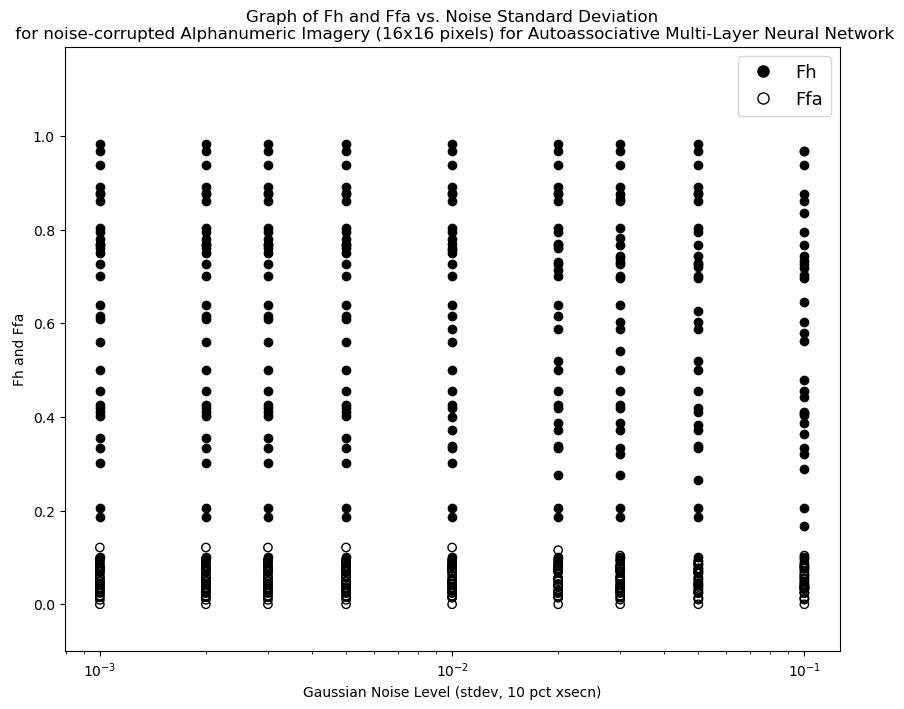

In [49]:
plt.figure(figsize=[10,8],dpi=100)
for i in range(1, len(sd)):
    plt.plot([sd[i]]*n_test_sample, Fh_res_all[i],'o', color='black')
    plt.scatter([sd[i]]*n_test_sample, Ffa_res_all[i], facecolors='none', edgecolors='black')
    plt.xscale('log')

# plt.xlim(0, 0.1)
plt.ylim(-0.1, 1.19)
plt.xlabel("Gaussian Noise Level (stdev, 10 pct xsecn)")
plt.ylabel("Fh and Ffa")
legend_elements = [Line2D([0], [0], marker='o', color='k', lw=0, markersize=8, markerfacecolor='k', label='Fh'),
                  Line2D([0], [0], marker='o', color='k', lw=0, markersize=8, markerfacecolor='w', label='Ffa')]
plt.legend(handles=legend_elements,fontsize=13)
# plt.text(0.002,1.1,'Training set = { \'C\', \'D\', \'E\', \'H\', \'I\', \'1\', \'3\', \'4\', \'5\', \'9\'}',fontsize=13)
plt.title("Graph of Fh and Ffa vs. Noise Standard Deviation\n for noise-corrupted Alphanumeric Imagery (16x16 pixels) for Autoassociative Multi-Layer Neural Network")

# plt.savefig('Fh_Ffa_noise.eps')

In [50]:
lowercase = list(string.ascii_lowercase)
uppercase = list(string.ascii_uppercase)
labels_all = np.array(uppercase + lowercase + list(range(1, 10)) + ['0', ':', '!', '"'])
labels_all
##A-Z is from 1 to 26
##a-z is from 27 to 52
##1 to 9 to 0 is from 53-62
## : is 63, ! is 64, " is 65  
labels = labels_all[[x - 1 for x in labels_test]]
Fh_df=pd.DataFrame(Fh_res_all,columns=labels,index=sd).T
Ffa_df=pd.DataFrame(Ffa_res_all,columns=labels,index=sd).T

In [51]:
table=pd.DataFrame()
for i in range(Fh_df.shape[1]):
    table=pd.concat([table,Fh_df.iloc[:,i],Ffa_df.iloc[:,i]],axis=1)
table=table.round(decimals=2)
table


,0.000,0.000,0.001,0.001,0.002,0.002,0.003,0.003,0.005,0.005,0.010,0.010,0.020,0.020,0.030,0.030,0.050,0.050,0.100,0.100
M,0.30,0.12,0.30,0.12,0.30,0.12,0.30,0.12,0.30,0.12,0.30,0.12,0.28,0.12,0.28,0.10,0.27,0.09,0.29,0.10
N,0.76,0.02,0.76,0.02,0.76,0.02,0.76,0.02,0.76,0.02,0.76,0.02,0.76,0.02,0.74,0.02,0.73,0.01,0.72,0.01
O,0.88,0.07,0.88,0.07,0.88,0.07,0.88,0.07,0.88,0.07,0.88,0.07,0.88,0.07,0.86,0.07,0.88,0.07,0.74,0.07
P,0.73,0.04,0.73,0.04,0.73,0.04,0.73,0.04,0.73,0.04,0.73,0.04,0.73,0.04,0.73,0.04,0.73,0.04,0.73,0.04
Q,0.77,0.08,0.77,0.08,0.77,0.08,0.77,0.08,0.77,0.08,0.76,0.08,0.73,0.08,0.73,0.08,0.72,0.09,0.65,0.08
R,0.79,0.04,0.79,0.04,0.79,0.04,0.79,0.04,0.79,0.04,0.79,0.04,0.79,0.04,0.78,0.03,0.79,0.04,0.79,0.04
S,0.70,0.05,0.70,0.05,0.70,0.05,0.70,0.05,0.70,0.05,0.70,0.05,0.70,0.04,0.70,0.04,0.70,0.04,0.58,0.04
T,0.94,0.02,0.94,0.02,0.94,0.02,0.94,0.02,0.94,0.02,0.94,0.02,0.94,0.02,0.94,0.02,0.94,0.02,0.94,0.02
U,0.89,0.04,0.89,0.04,0.89,0.04,0.89,0.04,0.89,0.04,0.89,0.04,0.89,0.04,0.89,0.04,0.89,0.04,0.84,0.03
V,0.10,0.03,0.10,0.03,0.10,0.03,0.10,0.03,0.10,0.03,0.10,0.03,0.10,0.03,0.10,0.03,0.10,0.03,0.10,0.03


### 6c)  Calculate your ROC Curves

In [52]:
cmaps= ['purple', 'green', 'orange',  'yellow', 'pink', 'grey', 'brown', 'black','blue', 'red']

In [53]:
#model 1
y_test_all =[]
y_score_all =[]
for sigma in sd:
    print(sigma)
    dataset_test_noise = NoiseData(dataset_test_reshaped, sigma)
    # test results
    y_test = np.empty(0, int)
    y_score = np.empty(0)
    for i, data in enumerate(dataset_test_noise):
        x = torch.from_numpy(data)
        output = model_Ap1(x)
        x = torch.from_numpy(data)
        out =round(model_Ap1(x).float().item())
        if out < 1:
            out = 1
        if out > 65:
            out = 65
        pred = dataset_all[out-1, 0]      
        x = dataset_test_reshaped[i].reshape([-1])
        y = pred.flatten()
        y_score = np.append(y_score, y)
        y_test = np.append(y_test, x)
    y_test_all.append(y_test)
    y_score_all.append(y_score)

0.0
0.001
0.002
0.003
0.005
0.01
0.02
0.03
0.05
0.1


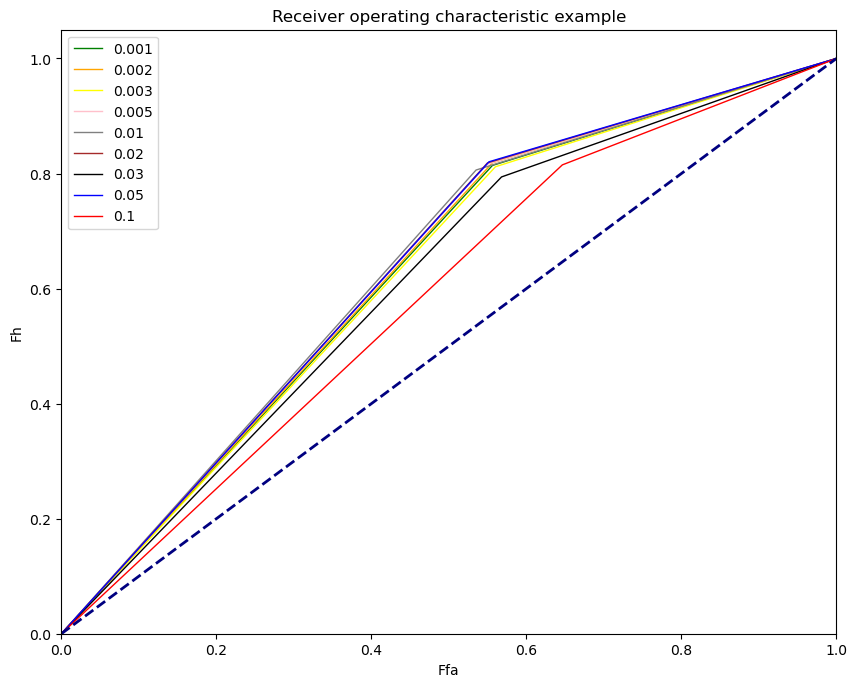

In [54]:
plt.figure(figsize=[10,8],dpi=100)
for i in range(1, len(sd)):
    fpr, tpr, _ = roc_curve(y_test_all[i], y_score_all[i])
    roc_auc = auc(fpr, tpr)
#     print(fpr)
    plt.plot(fpr, tpr, color=cmaps[i], lw=1, label = sd[i])   
    lw = 2
#     
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ffa')
plt.ylabel('Fh')
plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
plt.legend()
plt.show()


In [55]:
#model 2
y_test_all =[]
y_score_all =[]
for sigma in sd:
    print(sigma)
    dataset_test_noise = NoiseData(dataset_test_reshaped, sigma)
    # test results
    y_test = np.empty(0, int)
    y_score = np.empty(0)
    for i, data in enumerate(dataset_test_noise):
        x = torch.from_numpy(data)
        output = model_Ap2(x)
        x = dataset_test_reshaped[i].reshape([-1])
        y = output.flatten().detach().numpy()
        y_score = np.append(y_score, y)
        y_test = np.append(y_test, x)
    y_test_all.append(y_test)
    y_score_all.append(y_score)

0.0
0.001
0.002
0.003
0.005
0.01
0.02
0.03
0.05
0.1


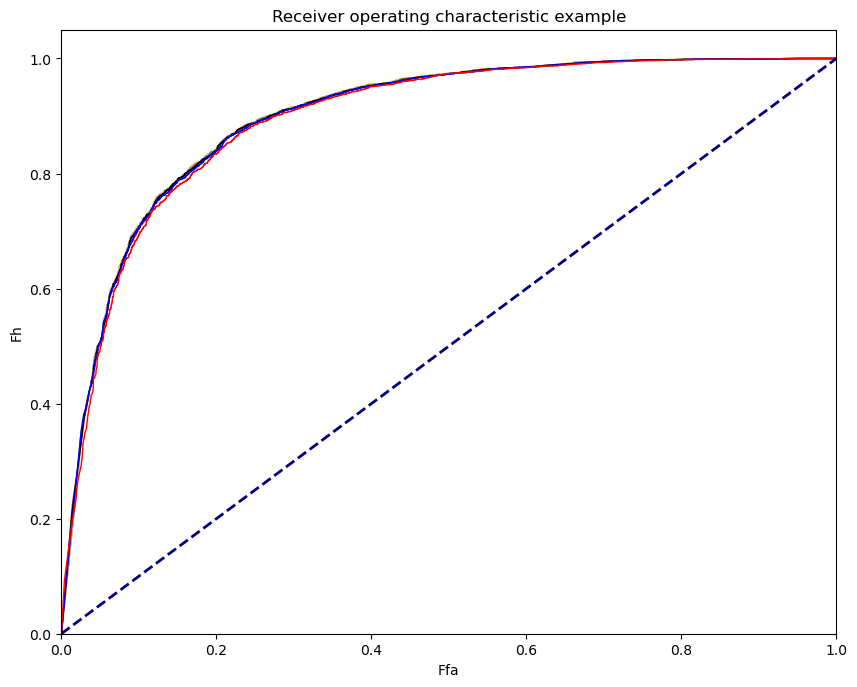

In [56]:
plt.figure(figsize=[10,8],dpi=100)
for i in range(1, len(sd)):
    fpr, tpr, _ = roc_curve(y_test_all[i], y_score_all[i])
    roc_auc = auc(fpr, tpr)
#     print(fpr)
    plt.plot(fpr, tpr, color=cmaps[i], lw=1)   
    lw = 2
#     
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ffa')
plt.ylabel('Fh')
plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
plt.show()
